# Lagrange polynomials
Illustration of simple properties of Lagrange polynomials from the ANN perspective

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

In [6]:
def f(x) :
    # a function to be represented
    return np.exp(-x**2*np.sin(np.pi*x)/2)*(0.2*x + 0.43)

The general view of the approximated function

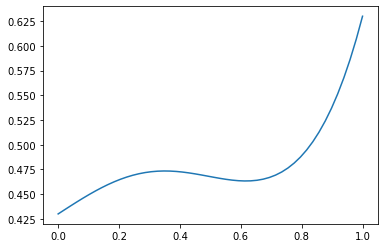

In [5]:
xran = np.linspace(0, 1, 50)
plt.plot(xran, f(xran))

The function finding parameters of the Lagrange approximation

In [8]:
def LNN(x, xtrain, ytrain) :
    # INPUT: pairs x_i, y_i in arrays xtrain and ytrain
    # OUTPUT: the evaluation of the Lagrange polynomial at x
    
    def PN(x, xt, num) :
        # Evaluates the num-th term in the Lagrange polynomial
        out = 1
        for jj in range(len(xt)) :
            if jj == num :
                continue
            out *= (x - xt[jj])/(xt[num] - xt[jj])
        return out
    
    N = len(xtrain) 
    if N != len(ytrain) :
        raise ValueError("The Lagrange interpolation requires matching lists of x and f(x)")
        
    out = 0
    for ii in range(N) :
        out += ytrain[ii]*PN(x, xtrain, ii)
        
    return out

Since the function is not too regular, it is sufficient to take some random points as the data points

In [70]:
Np = 300
xdata = np.linspace(0, 1, Np)

Ntrain = 47
inds = rnd.sample(range(Np), Ntrain)

xtrain = xdata[inds]
ytrain = f(xtrain)


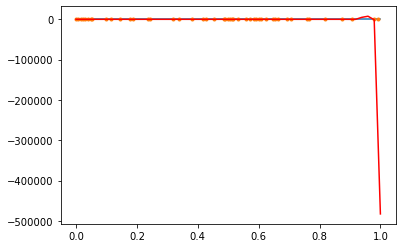

In [71]:
plt.plot(xran, f(xran))
plt.plot(xtrain, ytrain, '.')
plt.plot(xran, LNN(xran, xtrain, ytrain), 'r')